# <center>Challenge 0<center>

<p>Team Name:
<p>Student Names:

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# PART I

## Prepare Data

<b>A. Create a data set D with 100 data points with the following attributes (features) as such:</b><br>
seed = 0<br>
a1 is from a normal distribution N(mean=20,var=4)<br>
a2 is from a uniform distribution U(min=14,max=26)<br>

In [3]:
np.random.seed(0)

n = 100

a1 = np.random.normal(loc=20, scale=2, size=n)
a2 = np.random.uniform(low=14, high=26, size=n)

D = pd.DataFrame({
    "a1": a1,
    "a2": a2,
})

D

,a1,a2
0,23.528105,19.086261
1,20.800314,21.276719
2,21.957476,14.230318
3,24.481786,17.618898
4,23.735116,21.922082
...,...,...
95,21.413146,23.972581
96,20.021000,21.547782
97,23.571741,24.471808
98,20.253824,17.282504


x1 = 2*a1<br>
x2 = normal distribution N(mean=40,var=4)<br>
Pr(x1,x2,target) = {(x1, x2, 'P')}, data objects with class positive<br>
P = Rotate(Pr,45), rotate Pr by 45 degrees in counter-clockwise<br>
Nr = Shift(Pr,x1,20), shift in x1-dimension by 20 units towards right, data objects with class negative, where
Nr(x1,x2,target) = {(x1_shifted, x2, 'N')}<br>
N = Rotate(Nr,45), rotate Nr by 45 degrees in counter-clockwise<br>

In [4]:
x1 = 2 * a1
x2 = np.random.normal(loc=40, scale=2, size=n)

Pr = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "target": "P"
})

def rotate_df(df, theta_degrees):
    theta = np.deg2rad(theta_degrees)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])
    xy = df[["x1", "x2"]].to_numpy()
    xy_rotated = xy @ rotation_matrix.T  # Transpose for right multiplication
    out = df.copy()
    out["x1"] = xy_rotated[:, 0]
    out["x2"] = xy_rotated[:, 1]
    return out

P = rotate_df(Pr, 45)

Nr = Pr.copy()
Nr["x1"] = Nr["x1"] + 20
Nr["target"] = "N"

N = rotate_df(Nr, 45)

Pr.head(), P.head(), Nr.head(), N.head()

(          x1         x2 target
 0  47.056209  37.931514      P
 1  41.600629  41.363189      P
 2  43.914952  38.393181      P
 3  48.963573  38.620900      P
 4  47.470232  39.088935      P,
          x1         x2 target
 0  6.452134  60.095396      P
 1  0.167895  58.664278      P
 2  3.904482  58.200639      P
 3  7.313374  61.931575      P
 4  5.926472  61.206574      P,
           x1         x2 target
 0  67.056209  37.931514      N
 1  61.600629  41.363189      N
 2  63.914952  38.393181      N
 3  68.963573  38.620900      N
 4  67.470232  39.088935      N,
           x1         x2 target
 0  20.594269  74.237531      N
 1  14.310031  72.806414      N
 2  18.046618  72.342774      N
 3  21.455509  76.073711      N
 4  20.068608  75.348710      N)

### Merge Data

Merge P and N into a single set PN. 

In [5]:
PN = pd.concat([P, N], ignore_index=True)

PN

,x1,x2,target
0,6.452134,60.095396,P
1,0.167895,58.664278,P
2,3.904482,58.200639,P
3,7.313374,61.931575,P
4,5.926472,61.206574,P
...,...,...,...
195,16.002882,72.846913,N
196,13.607497,71.304713,N
197,23.114378,71.840844,N
198,11.735020,73.835717,N


# PART II

## Visualize Data
The axis scale should be the same. The class-P and -N data points will in red-circle and blue-triangle, respectively.

Plot Pr and P in the same figure on a separate sub-plots of 1 by 2:

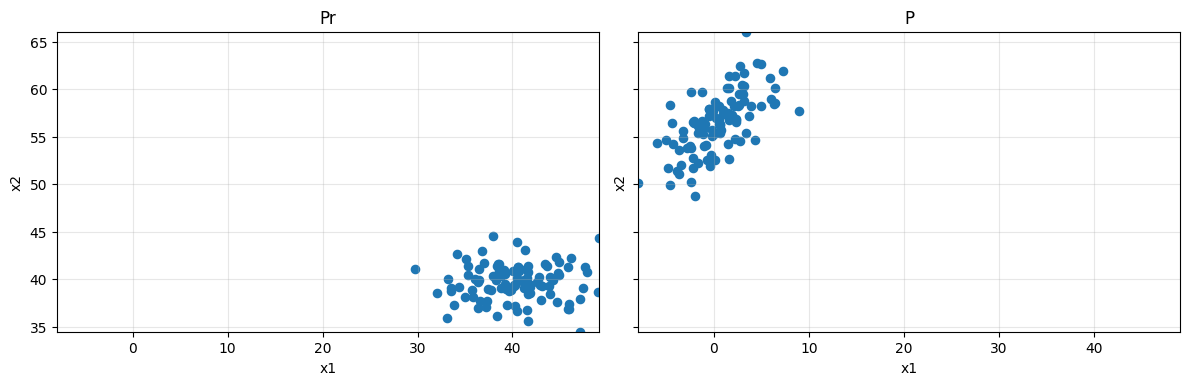

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

x_min = pd.concat([Pr["x1"], P["x1"]]).min()
x_max = pd.concat([Pr["x1"], P["x1"]]).max()
y_min = pd.concat([Pr["x2"], P["x2"]]).min()
y_max = pd.concat([Pr["x2"], P["x2"]]).max()

axes[0].scatter(Pr["x1"], Pr["x2"], marker="o", s=35)
axes[0].set_title("Pr")

axes[1].scatter(P["x1"], P["x2"], marker="o", s=35)
axes[1].set_title("P")

for ax in axes:
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Plot Nr and N in the same figure on a separate sub-plots of 1 by 2:

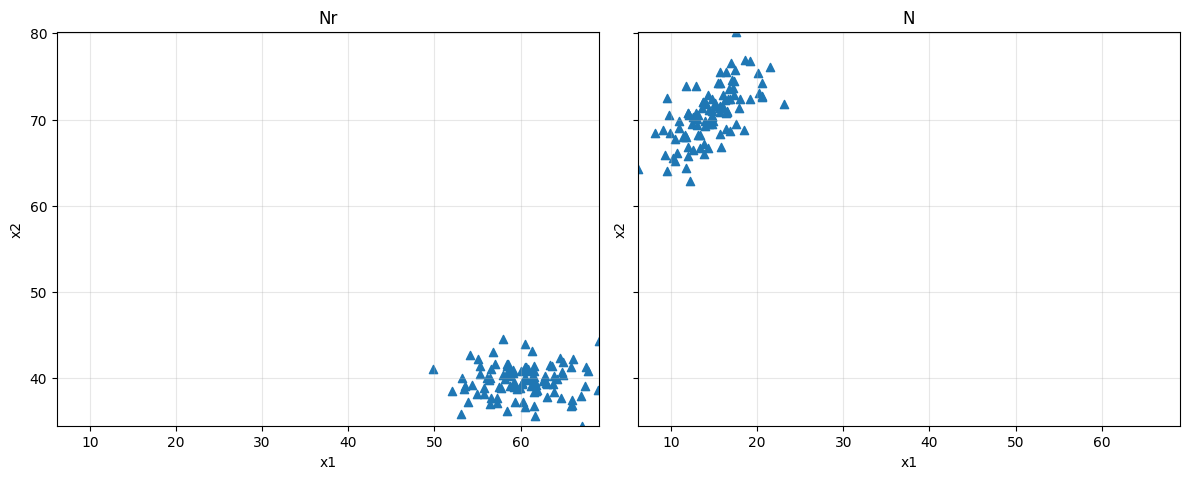

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

x_min = pd.concat([Nr["x1"], N["x1"]]).min()
x_max = pd.concat([Nr["x1"], N["x1"]]).max()
y_min = pd.concat([Nr["x2"], N["x2"]]).min()
y_max = pd.concat([Nr["x2"], N["x2"]]).max()

axes[0].scatter(Nr["x1"], Nr["x2"], marker="^", s=35)
axes[0].set_title("Nr")

axes[1].scatter(N["x1"], N["x2"], marker="^", s=35)
axes[1].set_title("N")

for ax in axes:
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect("equal", adjustable="box")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Plot {PN}:

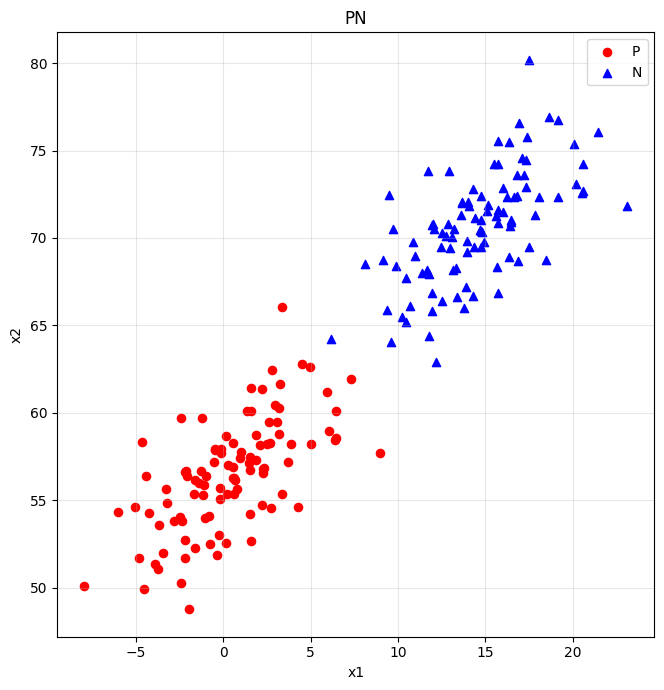

In [8]:
is_p = PN["target"] == "P"
is_n = PN["target"] == "N"

fig, ax = plt.subplots(figsize=(7, 7))

ax.scatter(PN.loc[is_p, "x1"], PN.loc[is_p, "x2"], 
           color="red", marker="o", s=35, label="P")

ax.scatter(PN.loc[is_n, "x1"], PN.loc[is_n, "x2"], 
           color="blue", marker="^", s=35, label="N")

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("PN")
ax.set_aspect("equal", adjustable="box")
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()


# PART III

## Simple Classifier

Classifier SimpleClassifier:
Given data D(x1, x2, target),<br>
If x1 + x2 > median, then predicted class:<br>
...    <b>N</b><br>
Else<br>
...    <b>P</b>

Obtain predicted class labels of the dataset PN using SimpleClassifier:

In [9]:
decision_median = (PN["x1"] + PN["x2"]).median()

PN["predicted"] = np.where(
    PN["x1"] + PN["x2"] > decision_median,
    "N",
    "P"
)

PN.head()


,x1,x2,target,predicted
0,6.452134,60.095396,P,P
1,0.167895,58.664278,P,P
2,3.904482,58.200639,P,P
3,7.313374,61.931575,P,P
4,5.926472,61.206574,P,P


Print output Y(x1,x2,True_Target, Predicted_Target)

In [10]:
Y = PN[["x1", "x2", "target", "predicted"]].copy()
Y.columns = ["x1", "x2", "True_Target", "Predicted_Target"]

Y.head(10)


,x1,x2,True_Target,Predicted_Target
0,6.452134,60.095396,P,P
1,0.167895,58.664278,P,P
2,3.904482,58.200639,P,P
3,7.313374,61.931575,P,P
4,5.926472,61.206574,P,P
5,-2.788879,53.829102,P,P
6,3.187879,58.755175,P,P
7,1.516372,54.195965,P,P
8,0.618267,55.366382,P,P
9,4.305715,54.585524,P,P


Plot output Y. Use the same marker shape. Predicted Target colors: P in Red and N in blue. Zoom in to show miss classified data points as needed.

Obtain the Confusion Matrix and print:

Claculate the Performance Scores of Accuracy, Recall (Sensitivity), Specificity, F1-score. Plot as bar-chart:

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.